In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

shutil.rmtree('/content/extracted/')
shutil.rmtree('/content/tarfile')

In [ ]:
# 필요한 라이브러리 import
import tarfile
import os

# 구글 드라이브 경로 설정
drive_path = '/content/drive/My Drive/Tarfile/최종데이터_invert_version.tar'  # tar 파일 경로 수정 필요

# 구글 드라이브에서 tar 파일 다운로드
os.makedirs('/content/tarfile', exist_ok=True)  # 압축 파일을 저장할 디렉토리 생성
os.system(f'cp "{drive_path}" /content/tarfile/')  # 드라이브에서 tar 파일을 복사하여 디렉토리에 저장

# 세션에 업로드한 tar 파일 압축 해제
with tarfile.open('/content/tarfile/최종데이터_invert_version.tar', 'r') as tar_ref:
    tar_ref.extractall('/content/extracted/')  # 압축을 푼 파일을 저장할 디렉토리 지정


In [ ]:
import os
import numpy as np
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
#모델 학습에 필요한 모듈
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten,Dropout,BatchNormalization,Activation
#데이터 가중치 적용
from sklearn.utils.class_weight import compute_class_weight
# 저장된 최적의 가중치를 불러오기
from keras.models import load_model
#파일 저장
from shutil import copyfile




In [ ]:
# 데이터 디렉토리 경로
data_directory = "/content/extracted/최종데이터_invert_version"

# 학습 데이터 디렉토리 경로
train_directory = os.path.join(data_directory, "train")
# 검증 데이터 디렉토리 경로
validation_directory = os.path.join(data_directory, "validation")
# 테스트 데이터 디렉토리 경로
test_directory = os.path.join(data_directory, "test")
# 이미지 크기 설정 (VGG-16의 입력 크기)
image_size = (224, 224)

# 이미지 데이터 전처리 및 데이터 증강을 위한 ImageDataGenerator 생성
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,  # 데이터 전처리 함수 (예: VGG-16의 preprocess_input)
    #zoom_range=0.2,  # 확대/축소 (80%에서 120% 범위 내에서 무작위 확대 또는 축소)
    #horizontal_flip=True,  # 수평 뒤집기 (50% 확률로 수평 뒤집기)

)

# 학습 데이터 및 검증 데이터 불러오기
train_generator = train_datagen.flow_from_directory(
    train_directory,
    target_size=image_size,
    batch_size=64,
    class_mode='categorical',
    subset=None,
    shuffle=True  # 데이터 랜덤 셔플 적용
)

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)

validation_generator = validation_datagen.flow_from_directory(
    validation_directory,
    target_size=image_size,
    batch_size=64,
    class_mode='categorical',
    subset=None  # 검증 데이터로 사용할 부분
)


Found 4758 images belonging to 7 classes.
Found 730 images belonging to 7 classes.


Epoch 1/200
75/75 [==============================] - ETA: 0s - loss: 1.9450 - accuracy: 0.1520
Epoch 1: val_accuracy improved from -inf to 0.41370, saving model to best_model_acc.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 1: val_loss improved from inf to 1.89650, saving model to best_model_loss.h5
75/75 [==============================] - 117s 1s/step - loss: 1.9450 - accuracy: 0.1520 - val_loss: 1.8965 - val_accuracy: 0.4137
Epoch 2/200
75/75 [==============================] - ETA: 0s - loss: 1.9039 - accuracy: 0.1988
Epoch 2: val_accuracy did not improve from 0.41370

Epoch 2: val_loss improved from 1.89650 to 1.70226, saving model to best_model_loss.h5
75/75 [==============================] - 72s 959ms/step - loss: 1.9039 - accuracy: 0.1988 - val_loss: 1.7023 - val_accuracy: 0.3603
Epoch 3/200
75/75 [==============================] - ETA: 0s - loss: 1.7597 - accuracy: 0.2821
Epoch 3: val_accuracy improved from 0.41370 to 0.46438, saving model to best_model_acc.h5

Epoch 3: val_loss improved from 1.70226 to 1.54202, saving model to best_model_loss.h5
75/75 [==============================] - 72s 958ms/step - loss: 1.7597 - accuracy: 0.2821 - val_loss: 1.5420 - val_accuracy: 0.4644
Epoch 4/200
75/

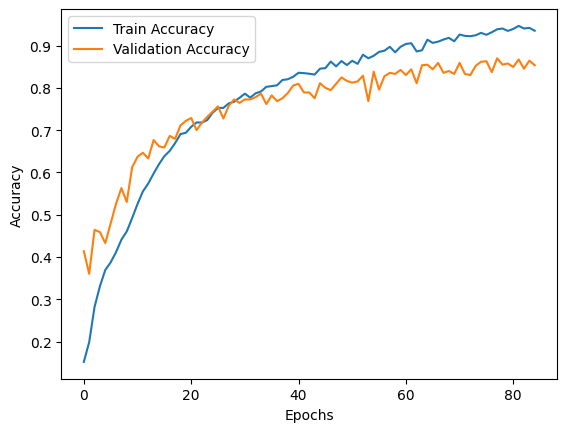

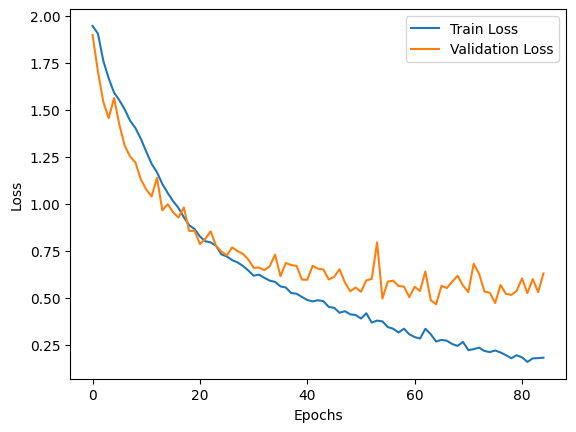

Found 739 images belonging to 7 classes.
12/12 [==============================] - 14s 1s/step - loss: 0.7676 - accuracy: 0.8106
테스트 데이터 어큐러시 (최종 모델 아직 선택전): 0.8105548024177551
12/12 [==============================] - 9s 668ms/step - loss: 0.8549 - accuracy: 0.8106
테스트 데이터 어큐러시 (최대정확도 모델): 0.8105548024177551
12/12 [==============================] - 9s 671ms/step - loss: 0.7676 - accuracy: 0.8106
테스트 데이터 어큐러시 (최저손실 모델): 0.8105548024177551


In [ ]:
input_shape = (224, 224, 3)
input_layer = Input(shape=input_shape)

# VGG16 모델 레이어 구성
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(input_layer)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

# Fully Connected 레이어
x = GlobalAveragePooling2D()(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)  # 드롭아웃 레이어 추가 (0.5는 드롭아웃 비율을 나타냄)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)  # 드롭아웃 레이어 추가
predictions = Dense(7, activation='softmax')(x)  # 클래스 개수를 7으로 설정

# 모델 생성
model = Model(inputs=input_layer, outputs=predictions)

# 모델 컴파일
model.compile(optimizer=Adam(learning_rate=0.000005), loss='categorical_crossentropy', metrics=['accuracy'])


# 모델 체크포인트 콜백 설정
model_checkpoint_acc = ModelCheckpoint('best_model_acc.h5', save_best_only=True, monitor='val_accuracy', mode='max', verbose=1)
model_checkpoint_loss = ModelCheckpoint('best_model_loss.h5', save_best_only=True, monitor='val_loss', mode='min', verbose=1)

# 조기 종료 콜백 설정
early_stopping = EarlyStopping(patience=20, monitor='val_loss', mode='min',restore_best_weights=True, verbose=1)

#데이터 가중치 적용

# 클래스 레이블을 가져오고 유일한 클래스 레이블을 찾습니다.
class_labels = train_generator.classes
unique_classes = np.unique(class_labels)

# 클래스별로 빈도수를 계산합니다.
class_counts = np.bincount(class_labels)

# 클래스 가중치를 계산합니다.
total_samples = len(class_labels)
class_weights = total_samples / (len(unique_classes) * class_counts)

# 클래스 가중치를 딕셔너리로 만듭니다.
class_weight_dict = {class_index: weight for class_index, weight in enumerate(class_weights)}

# 모델 학습
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=200,
    callbacks=[model_checkpoint_acc,model_checkpoint_loss, early_stopping],
    class_weight=class_weight_dict
)
# 최대정확도 모델 파일 경로 설정 (Colab 세션 내에서 저장된 경로)
best_model_acc_path = '/content/best_model_acc.h5'

# 모델을 Google Drive에 복사
drive_model_path = '/content/drive/My Drive/모델 저장소/최대 정확도 모델/best_model_acc.h5'
copyfile(best_model_acc_path, drive_model_path)

# 최저손실 모델 파일 경로 설정 (Colab 세션 내에서 저장된 경로)
best_model_loss_path = '/content/best_model_loss.h5'

# 모델을 Google Drive에 복사
drive_model_path = '/content/drive/My Drive/모델 저장소/최저 손실 모델/best_model_loss.h5'
copyfile(best_model_loss_path, drive_model_path)

# 최종 모델을 저장할 파일 경로 설정
final_model_path = '/content/final_model.h5'

# 모델 저장
model.save(final_model_path)

# Google Drive에 복사
drive_model_path = '/content/drive/My Drive/모델 저장소/최종 학습 모델/final_model.h5'
copyfile(final_model_path, drive_model_path)


# 학습 과정에서 얻은 데이터 추출
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# 정확도 그래프 그리기
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실 그래프 그리기
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 테스트 데이터 불러오기
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)  # 테스트 데이터에는 단순한 정규화만 적용
test_generator = test_datagen.flow_from_directory(
    test_directory,
    target_size=image_size,
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)

# 테스트 어큐러시 출력 (최종모델 아직 선택전)
test_loss, test_acc = model.evaluate(test_generator)
print("테스트 데이터 어큐러시 (최종 모델 -> 최저 손실 모델):", test_acc)

# 저장된 최적의 가중치를 불러오기
best_model_acc = load_model('best_model_acc.h5')

# 불러온 모델을 사용하여 예측 또는 평가 수행
test_loss, test_acc = best_model_acc.evaluate(test_generator)
print("테스트 데이터 어큐러시 (최대 정확도 모델):", test_acc)


# 저장된 최적의 가중치를 불러오기
best_model_loss = load_model('best_model_loss.h5')

# 불러온 모델을 사용하여 예측 또는 평가 수행
test_loss, test_acc = best_model_loss.evaluate(test_generator)
print("테스트 데이터 어큐러시 (최저 손실 모델):", test_acc)


In [ ]:
# 테스트 이미지 경로
test_image_path = "/content/extracted/데이터/test/배치도/047. T9103066-002 905정거장 안전관리실 기기배치도 및 바닥 TRAY 설치도.jpeg"

# 테스트 이미지 불러오기
img = image.load_img(test_image_path, target_size=image_size)
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)

# 예측 수행
predictions = model.predict(img)

# 예측 결과를 클래스 이름으로 변환
class_index = np.argmax(predictions)
class_labels = train_generator.class_indices
predicted_class = [k for k, v in class_labels.items() if v == class_index][0]

print("예측된 클래스:", predicted_class)


1/1 [==============================] - 0s 17ms/step
예측된 클래스: 배치도
